In [38]:
import lasio
import numpy as np
import pandas
import matplotlib.pyplot as plt

# Загрузка данных

In [40]:
las = lasio.read("well 1.las")
data = las.df()
data

,AK,BK,BK_3,DS,DS_2,DT_1,GGP,GGP_1,GK,GK_3,NNB,NNB_1,PS,PS_3
DEPT,,,,,,,,,,,,,,
3650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.409
3650.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,186.669
3650.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.159
3650.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.266
3650.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231.6,NaN,19.58,NaN,197.33,NaN,NaN,NaN,NaN,6.630,NaN,9.580,NaN,207.652,NaN
4231.7,NaN,18.74,NaN,197.52,NaN,NaN,NaN,NaN,6.932,NaN,9.451,NaN,207.554,NaN
4231.8,NaN,18.79,NaN,197.64,NaN,NaN,NaN,NaN,7.059,NaN,9.240,NaN,207.476,NaN


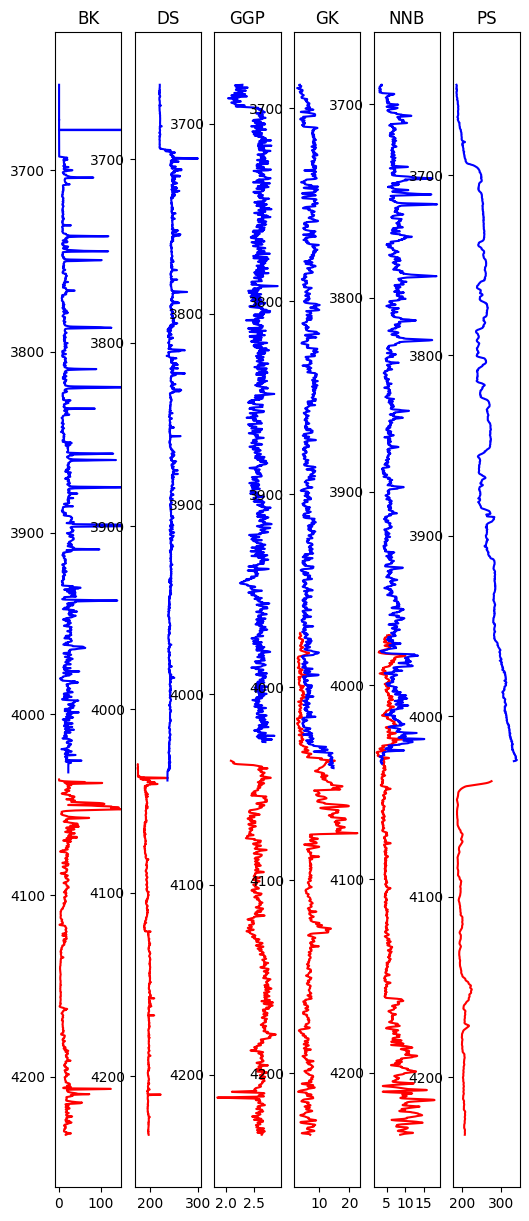

In [47]:
fig, axs = plt.subplots(1, 6)
fig.set_size_inches(6,15)
axs[0].plot(data.BK, data.index, c="red")
axs[0].plot(data.BK_3, data.index, c="blue")
axs[0].set_title("BK")
axs[0].set_xlim((-10, 150))

axs[1].plot(data.DS, data.index, c="red")
axs[1].plot(data.DS_2, data.index, c="blue")
axs[1].set_title("DS")

axs[2].plot(data.GGP, data.index, c="red")
axs[2].plot(data.GGP_1, data.index, c="blue")
axs[2].set_title("GGP")

axs[3].plot(data.GK, data.index, c="red")
axs[3].plot(data.GK_3, data.index, c="blue")
axs[3].set_title("GK")

axs[4].plot(data.NNB, data.index, c="red")
axs[4].plot(data.NNB_1, data.index, c="blue")
axs[4].set_title("NNB")

axs[5].plot(data.PS, data.index, c="red")
axs[5].plot(data.PS_3, data.index, c="blue")
axs[5].set_title("PS")

for ax in axs:
    ax.invert_yaxis()

In [ ]:
data.loc[:,'BK_F'] = data.loc[:,['BK','BK_3']].sum(axis=1, min_count=1)
data.loc[:,'DS_F'] = data.loc[:,['DS','DS_2']].sum(axis=1, min_count=1)
data.loc[:,'GGP_F'] = data.loc[:,['GGP','GGP_1']].sum(axis=1, min_count=1)
data.loc[:,'GK_F'] = data.loc[:,['GK','GK_3']].sum(axis=1, min_count=1)
data.loc[:,'NNB_F'] = data.loc[:,['NNB','NNB_1']].sum(axis=1, min_count=1)
data.loc[:,'PS_F'] = data.loc[:,['PS','PS_3']].sum(axis=1, min_count=1)